In [8]:
!pip install pyodbc


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pyodbc
import configparser
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!ping 192.168.119.2


Envoi d'une requ�te 'Ping'  192.168.119.2 avec 32 octets de donn�es�:
R�ponse de 192.168.119.2�: octets=32 temps=1 ms TTL=128
R�ponse de 192.168.119.2�: octets=32 temps<1ms TTL=128
R�ponse de 192.168.119.2�: octets=32 temps<1ms TTL=128
R�ponse de 192.168.119.2�: octets=32 temps<1ms TTL=128

Statistiques Ping pour 192.168.119.2:
    Paquets�: envoy�s = 4, re�us = 4, perdus = 0 (perte 0%),
Dur�e approximative des boucles en millisecondes :
    Minimum = 0ms, Maximum = 1ms, Moyenne = 0ms


In [11]:
pyodbc.drivers()

['SQL Server', 'SQL Anywhere 17']

In [12]:
conf_path = '../configurations/db.cfg'
print("Fichier trouvé :", os.path.exists(conf_path))

Fichier trouvé : True


In [13]:
try:
    config = configparser.ConfigParser()
    config.read(conf_path)

    print("Sections trouvées :", config.sections())

    if 'database' not in config:
        raise Exception("Section [database] manquante dans db.cfg")

    db = config['database']
    conn_str = (
        f"DRIVER={{{db['DRIVER']}}};"
        f"SERVER={db['SERVER']};"
        f"UID={db['UID']};"
        f"PWD={db['PWD']};"
        f"DATABASE={db['DATABASE']};"
    )

    conn = pyodbc.connect(conn_str)
    print("Connexion réussie.")
except Exception as e:
    print("Erreur lors de la connexion à la base de données :", e)
""" finally:
    if 'conn' in locals():
        conn.close()
        print("Connexion fermée.") """


Sections trouvées : ['database']
Connexion réussie.


' finally:\n    if \'conn\' in locals():\n        conn.close()\n        print("Connexion fermée.") '

**Importation des données**

In [14]:
try:
    cursor = conn.cursor()
    cursor.execute("SELECT TOP (5) * FROM [inFlow].[dbo].[VIEW_Mouvement]")
    for row in cursor.fetchall():
        print(row)
except pyodbc.Error as e:
    print("Erreur :", e)
finally:
    if 'conn' in locals():
        conn.close()

(460, 6, 'PO-000017', datetime.datetime(2019, 8, 10, 15, 1, 27, 550000), Decimal('2.0000'), None, 100, None, None, Decimal('0.0000'), Decimal('2.0000'), 'ACIVIR 5% CR T/5G CIPLA', 127, '', Decimal('8000.00000'))
(6073, 6, 'PO-000017', datetime.datetime(2019, 8, 31, 11, 59, 41, 457000), Decimal('2.0000'), None, 100, None, None, Decimal('-1.0000'), Decimal('1.0000'), 'ACIVIR 5% CR T/5G CIPLA', 127, '', Decimal('8000.00000'))
(1800, 3, 'SO-000126', datetime.datetime(2019, 8, 13, 9, 11, 21, 163000), Decimal('1.0000'), 100, 1, Decimal('2.0000'), Decimal('1.0000'), Decimal('0.0000'), Decimal('1.0000'), 'ACIVIR 5% CR T/5G CIPLA', 127, '', Decimal('8000.00000'))
(14744, 3, 'SO-002885', datetime.datetime(2019, 9, 30, 11, 37, 17, 793000), Decimal('1.0000'), 100, 1, Decimal('1.0000'), Decimal('0.0000'), Decimal('0.0000'), Decimal('1.0000'), 'ACIVIR 5% CR T/5G CIPLA', 127, '', Decimal('8000.00000'))
(5973, 6, 'PO-000017', datetime.datetime(2019, 8, 31, 11, 57, 3, 590000), Decimal('2.0000'), 100, N

In [15]:
# Récupération des données dans une DataFrame
def get_data(query):
    conn = pyodbc.connect(conn_str)
    df = pd.read_sql(query, conn)
    conn.close()
    return df

df = get_data("SELECT TOP 100 PERCENT * FROM [inFlow].[dbo].[VIEW_Mouvement]")

C:\Users\herif\AppData\Local\Temp\ipykernel_8452\3030561299.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [16]:
df.head(5)

,InventoryLogDetailId,BatchType,Remarks,TransactionDate,Quantity,FromLocationId,ToLocationId,FromQuantityBefore,FromQuantityAfter,ToQuantityBefore,ToQuantityAfter,Name,ProdId,PerDate,UnitPrice
0,100,6,PO-000001,2019-08-08 01:36:28.523,80.0,NaN,100.0,NaN,NaN,0.0,80.0,ZINNIA-F CP ENR B/3*28 FAMY CARE LTD,4968,,14200.0
1,101,6,PO-000001,2019-08-08 01:36:28.523,12.0,NaN,100.0,NaN,NaN,0.0,12.0,ZINNIA-F CP ENR DET PL/28 FAMY CARE LTD,4969,2510,4800.0
2,102,6,PO-000006,2019-08-08 14:56:17.520,2.0,NaN,100.0,NaN,NaN,0.0,2.0,"ALLERGODIL 0,127MG/DOSE SPRAY NASAL FL/17ML MYLAN",221,2509,27100.0
3,103,6,PO-000006,2019-08-08 14:56:17.520,2.0,NaN,100.0,NaN,NaN,0.0,2.0,BIRODOGYL B/10 CP PELLIC SANOFI,815,,50900.0
4,104,6,PO-000006,2019-08-08 14:56:17.520,1.0,NaN,100.0,NaN,NaN,0.0,1.0,CARVEDI-DENK 25MG CP B/30 DENK PHARMA,1062,2605/2701,46700.0


In [17]:
print(df.shape)

(837703, 15)


In [18]:
df['BatchType'].unique()

array([6, 3, 5, 1], dtype=int64)

In [19]:
# Référence des produits pour l'affichage des résultats
item_map = pd.read_csv('../data/ProductIdMapp.csv', sep=',')
item_map.set_index('ProdId', inplace=True)
item_map = item_map.rename(columns={'ItemName': 'Name'})
item_map.head()

,Name
ProdId,
100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
104,804 PACK MINCEUR
105,804 SOUPE B/300G LEGUMES


**Récupérer les mouvements des produits périmables**

In [20]:
# Filtrez les données dont 'PerDate' est différent de ""
df['PerDate'] = df['PerDate'].astype(str).str.strip()

# Filtrer les lignes où 'PerDate' n'est pas vide
df_1 = df.copy()
df_1 = df_1[df_1['PerDate'] != ""]
df_1.reset_index(drop=True, inplace=True)
print(df_1.shape)

(535721, 15)


In [21]:
df_1.head(5)

,InventoryLogDetailId,BatchType,Remarks,TransactionDate,Quantity,FromLocationId,ToLocationId,FromQuantityBefore,FromQuantityAfter,ToQuantityBefore,ToQuantityAfter,Name,ProdId,PerDate,UnitPrice
0,101,6,PO-000001,2019-08-08 01:36:28.523,12.0,NaN,100.0,NaN,NaN,0.0,12.0,ZINNIA-F CP ENR DET PL/28 FAMY CARE LTD,4969,2510,4800.0
1,102,6,PO-000006,2019-08-08 14:56:17.520,2.0,NaN,100.0,NaN,NaN,0.0,2.0,"ALLERGODIL 0,127MG/DOSE SPRAY NASAL FL/17ML MYLAN",221,2509,27100.0
2,104,6,PO-000006,2019-08-08 14:56:17.520,1.0,NaN,100.0,NaN,NaN,0.0,1.0,CARVEDI-DENK 25MG CP B/30 DENK PHARMA,1062,2605/2701,46700.0
3,106,6,PO-000006,2019-08-08 14:56:17.520,3.0,NaN,100.0,NaN,NaN,0.0,3.0,DICLO DENK 100MG SUPPO B/10 DENK PHARMA,1476,2511,18300.0
4,107,6,PO-000006,2019-08-08 14:56:17.520,1.0,NaN,100.0,NaN,NaN,0.0,1.0,"FLOXSOL 0,3% COLLYRE FL/5ML EXPHAR",1964,2508,6700.0


**Traitement des valeurs nulles et les colonnes inutiles**

In [22]:
def fill_columns(row):
    # Cas où BatchType n'est pas pris en charge explicitement
    if row['BatchType'] not in [1, 3, 5, 6]:
        row['LastStock'] = 0
        row['CurrentStock'] = 0
        return row

    # Cas où l'on doit inverser la quantité et prendre les valeurs "From"
    if (row['BatchType'] in [1, 5, 6] and not np.isnan(row['FromLocationId'])) or row['BatchType'] == 3:
        row['Quantity'] *= -1
        row['LastStock'] = row['FromQuantityBefore']
        row['CurrentStock'] = row['FromQuantityAfter']
        return row

    # Cas où l'on prend les valeurs "To"
    if row['BatchType'] in [1, 5, 6] and np.isnan(row['FromLocationId']):
        row['LastStock'] = row['ToQuantityBefore']
        row['CurrentStock'] = row['ToQuantityAfter']
        return row

    # Sécurité (ne devrait jamais arriver)
    row['LastStock'] = 0
    row['CurrentStock'] = 0
    return row

In [23]:
# Create the two new columns and apply the function to each row
df_1['LastStock'] = 0
df_1['CurrentStock'] = 0
df_1 = df_1.apply(fill_columns, axis=1)

# Supprimer les colonnes inutiles
df_1.drop(columns = ['InventoryLogDetailId', 'FromLocationId', 'ToLocationId', 'FromQuantityBefore', 'FromQuantityAfter', 'ToQuantityBefore', 'ToQuantityAfter'], inplace=True)

# Afficher le dataframe mis à jour
df_1.head()

,BatchType,Remarks,TransactionDate,Quantity,Name,ProdId,PerDate,UnitPrice,LastStock,CurrentStock
0,6,PO-000001,2019-08-08 01:36:28.523,12.0,ZINNIA-F CP ENR DET PL/28 FAMY CARE LTD,4969,2510,4800.0,0.0,12.0
1,6,PO-000006,2019-08-08 14:56:17.520,2.0,"ALLERGODIL 0,127MG/DOSE SPRAY NASAL FL/17ML MYLAN",221,2509,27100.0,0.0,2.0
2,6,PO-000006,2019-08-08 14:56:17.520,1.0,CARVEDI-DENK 25MG CP B/30 DENK PHARMA,1062,2605/2701,46700.0,0.0,1.0
3,6,PO-000006,2019-08-08 14:56:17.520,3.0,DICLO DENK 100MG SUPPO B/10 DENK PHARMA,1476,2511,18300.0,0.0,3.0
4,6,PO-000006,2019-08-08 14:56:17.520,1.0,"FLOXSOL 0,3% COLLYRE FL/5ML EXPHAR",1964,2508,6700.0,0.0,1.0


### Analyse Exploratoire des Données

**Compréhension générale des données**

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535721 entries, 0 to 535720
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BatchType        535721 non-null  int64         
 1   Remarks          535721 non-null  object        
 2   TransactionDate  535721 non-null  datetime64[ns]
 3   Quantity         535721 non-null  float64       
 4   Name             535721 non-null  object        
 5   ProdId           535721 non-null  int64         
 6   PerDate          535721 non-null  object        
 7   UnitPrice        534488 non-null  float64       
 8   LastStock        535721 non-null  float64       
 9   CurrentStock     535721 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 40.9+ MB


**Analyse des différents types de mouvements**

*Effectif par type de mouvement*

In [25]:
# Créer un map pour la légende
batch_type_map = {
    1: 'Ajustement',
    3: 'Assortiment',
    5: 'Réapprovisionnement',
    6: 'Reception',
}

batch_type = df_1['BatchType'].map(batch_type_map)
eff = batch_type.value_counts()
eff

BatchType
Assortiment            403934
Reception              128544
Ajustement               3221
Réapprovisionnement        22
Name: count, dtype: int64

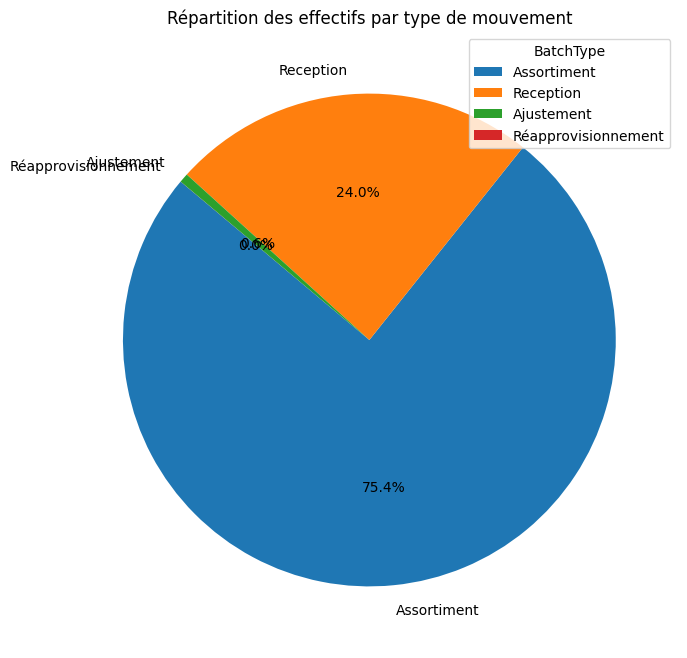

In [26]:
plt.figure(figsize=(10, 8))
plt.pie(eff, labels = eff.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des effectifs par type de mouvement')
plt.ylabel('')
plt.legend(title='BatchType', loc='upper right')
plt.show()

*Quantité par type de mouvement*

In [27]:
# Regrouper les données par 'BatchType' et calculer la somme des 'Quantity'
quantite_par_batch = df_1.copy()
quantite_par_batch = quantite_par_batch[['BatchType', 'Quantity']].groupby('BatchType').sum().reset_index()
quantite_par_batch = quantite_par_batch.rename(columns={'Quantity': 'TotalQuantity'})
quantite_par_batch['TotalQuantity'] = quantite_par_batch['TotalQuantity'].abs()

In [28]:
quantite_par_batch['Type'] = quantite_par_batch['BatchType'].map(batch_type_map)

In [29]:
quantite_par_batch['pourcentage'] = quantite_par_batch['TotalQuantity'] / quantite_par_batch['TotalQuantity'].sum() * 100
quantite_par_batch

,BatchType,TotalQuantity,Type,pourcentage
0,1,5133.0,Ajustement,0.410225
1,3,618435.0,Assortiment,49.424743
2,5,28.0,Réapprovisionnement,0.002238
3,6,627670.0,Reception,50.162795


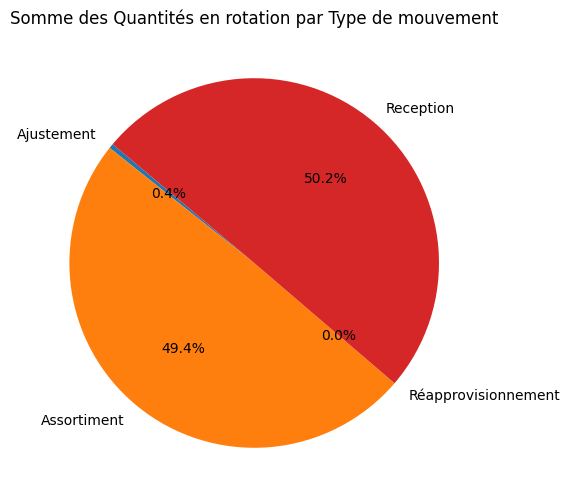

In [30]:
plt.figure(figsize=(10, 6))
plt.pie(quantite_par_batch['TotalQuantity'], labels=quantite_par_batch['Type'], autopct='%1.1f%%', startangle=140)
plt.title('Somme des Quantités en rotation par Type de mouvement')
plt.ylabel('')
plt.show()

**Analyse par produit**

In [31]:
# Calculer la moyenne des quantités par produit
s_1 = df_1.copy()

s_1 = s_1[['ProdId', 'Quantity']].groupby('ProdId').agg(
    Moves=('ProdId', 'count'),
    Quantity=('Quantity', 'mean')
).reset_index()

In [32]:
s_1.sort_values(by='Quantity', ascending=False, inplace=True, ignore_index=True)
s_1.head(7)

,ProdId,Moves,Quantity
0,7625,6,4.000000
1,7662,2,3.000000
2,449,5,2.800000
3,2585,118,2.169492
4,7612,2,2.000000
5,7734,2,2.000000
6,7198,1,2.000000


In [33]:
s_1[['Moves', 'Quantity']].describe()

,Moves,Quantity
count,2038.000000,2038.000000
mean,262.866045,0.035239
std,488.759703,0.271270
min,1.000000,-5.478261
25%,40.000000,0.000000
50%,129.000000,0.008999
75%,295.000000,0.029165
max,7578.000000,4.000000


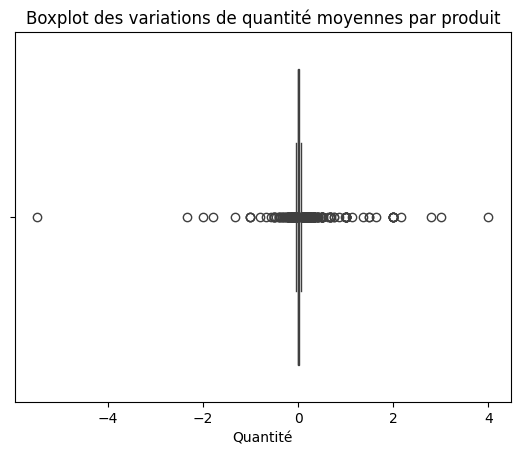

In [34]:
# Visualisation des valeures aberrantes
sns.boxplot(x=s_1['Quantity'])
plt.title('Boxplot des variations de quantité moyennes par produit')
plt.xlabel('Quantité')
plt.show()

Text(0.5, 1.0, 'Scatter plot of Moves vs QuantityMean')

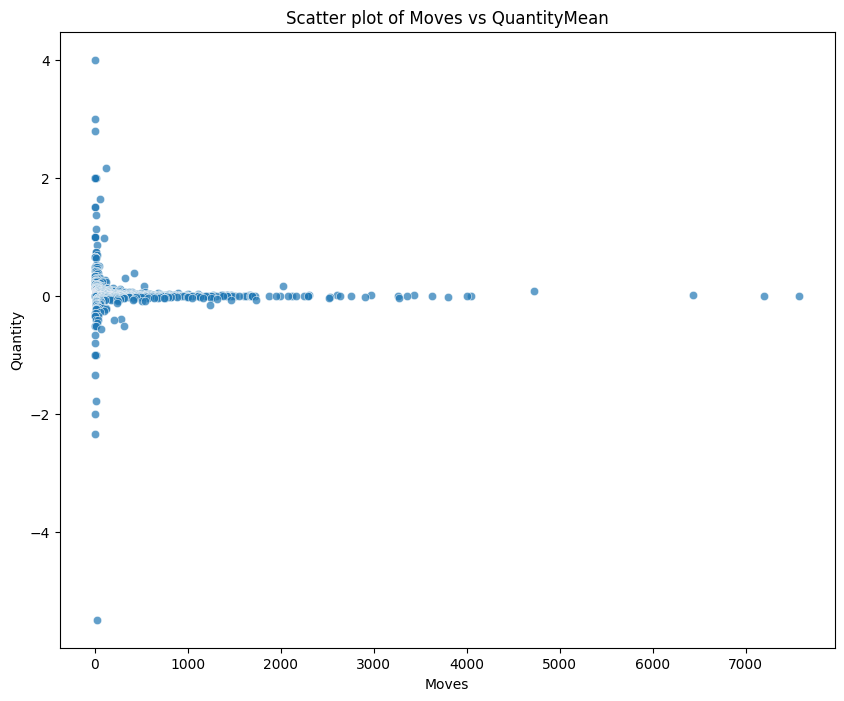

In [35]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=s_1,
    x='Moves',
    y='Quantity',
    sizes=(20, 200),
    alpha=0.7
)
ax.set_title('Scatter plot of Moves vs QuantityMean')

### CLUSTERING

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

**Normalisation des données**

In [37]:
X = s_1[['Moves', 'Quantity']].values
print(X[:5])

XS = StandardScaler().fit_transform(X)

print(XS[:5])

[[  6.           4.        ]
 [  2.           3.        ]
 [  5.           2.8       ]
 [118.           2.16949153]
 [  2.           2.        ]]
[[-0.52567568 14.61914961]
 [-0.53386167 10.93187841]
 [-0.52772217 10.19442417]
 [-0.29646798  7.86956843]
 [-0.53386167  7.24460721]]


**Modèle de classification DBSCAN**

*Choix du paramètre epsilon*

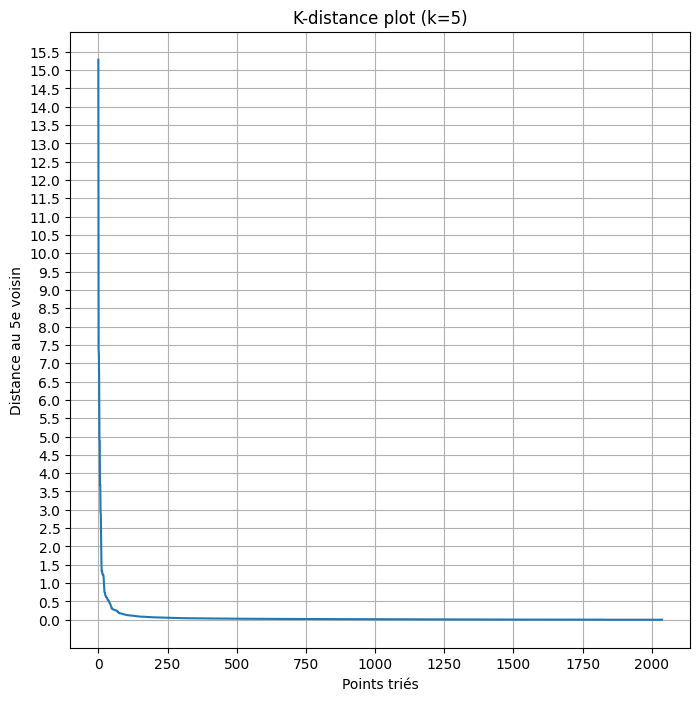

In [38]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(XS)
distances, indices = neighbors_fit.kneighbors(XS)

# On prend la distance au 4ème voisin (index 4 car index 0 est lui-même)
distances_5 = np.sort(distances[:, 4])[::-1]  # tri décroissant

plt.figure(figsize=(8, 8))
plt.plot(distances_5)
plt.title("K-distance plot (k=5)")
plt.xlabel("Points triés")
plt.ylabel("Distance au 5e voisin")
plt.yticks(np.arange(0, max(distances_5) + 0.5, 0.5))
plt.grid()
plt.show()

*Création et entrainement du modèle*

In [39]:
db = DBSCAN(eps=0.5, min_samples=5).fit(XS)

In [40]:
print(np.unique(db.labels_))

[-1  0  1  2  3]


*Affichage des clusters*

In [41]:
# Prédiction des clusters
s_2 = s_1.copy()
s_2['DB_Cluster'] = db.labels_
s_2.head(8)

,ProdId,Moves,Quantity,DB_Cluster
0,7625,6,4.000000,-1
1,7662,2,3.000000,-1
2,449,5,2.800000,-1
3,2585,118,2.169492,-1
4,7612,2,2.000000,0
5,7734,2,2.000000,0
6,7198,1,2.000000,0
7,7508,2,2.000000,0


In [42]:
s_2['DB_Cluster'].value_counts()

DB_Cluster
 2    1988
-1      27
 1      11
 0       7
 3       5
Name: count, dtype: int64

Text(0.5, 1.0, 'DBSCAN Clustering (eps=0.5, min_samples=5)')

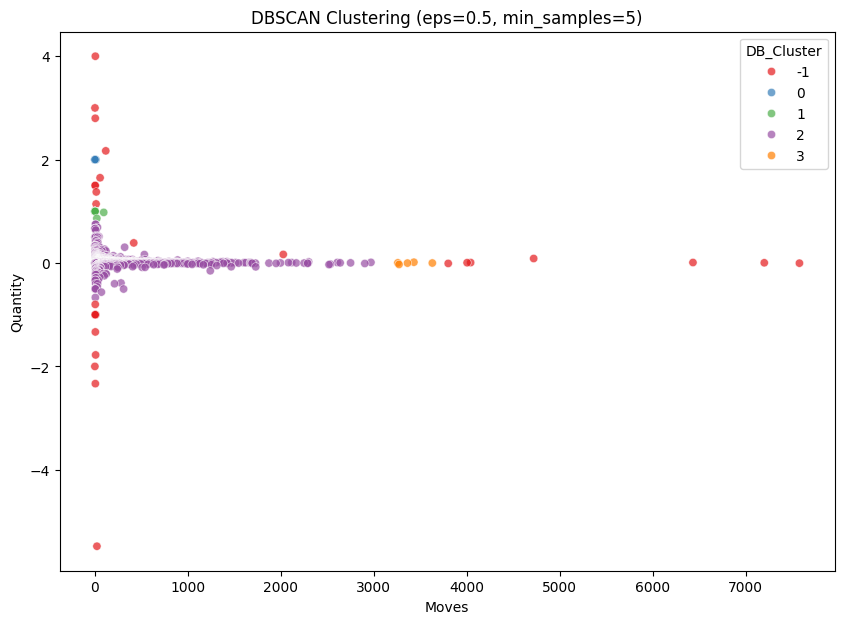

In [43]:
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=s_2,
    x='Moves',
    y='Quantity',
    hue='DB_Cluster',
    palette='Set1',
    sizes=(20, 200),
    alpha=0.7
)
ax.set_title('DBSCAN Clustering (eps=0.5, min_samples=5)')

*Evaluation du modèle DBSCAN*

In [44]:
 # Evaluer la qualité du clustering DBSCAN
db_score = silhouette_score(XS, db.labels_)
print(f"DBSCAN Silhouette Score: {db_score:.2f}")

DBSCAN Silhouette Score: 0.77


In [45]:
# Afficher les prédiction du modeèl DBSCAN
seuil_exces = 1
classe = -1

dbs_surstock = s_2[(s_2['DB_Cluster'] == classe) & (s_2['Quantity'] > seuil_exces)].copy()
dbs_surstock = dbs_surstock.merge(item_map, on ='ProdId', how='left')
dbs_surstock = dbs_surstock[['Name', 'Moves', 'Quantity']]
dbs_surstock

,Name,Moves,Quantity
0,SILYBON 140MG CP DET PL/10 MICROLABS,6,4.000000
1,MIA BAUME RADRIAKAT/50ML,2,3.000000
2,ATORVASTATINE 10MG B/30 ARROW,5,2.800000
3,LAME A BISTOURIE N 10 DET,118,2.169492
4,LAME A BISTOURIE N 12 DET,57,1.649123
5,PURESSENTIEL RESP OK FRICTION PECTORAL FL/100M...,4,1.500000
6,"NAZOLIN 0,05% GTTE NAS FL/10ML SHIFA",4,1.500000
7,MECONERV FORTE CP DET PL/10 MICROLABS,16,1.375000
8,PARACETAMOL 500MG B/100 IPCA,14,1.142857


*Optimisation des paramètres du modèle DBSCAN*

In [46]:
for eps in [0.4, 0.5, 0.6, 0.7, 0.8,1.0, 1.2, 1.5, 2.5, 7.0]:
    db = DBSCAN(eps=eps, min_samples=5).fit(XS)
    db_score = silhouette_score(XS, db.labels_)
    print(f"DBSCAN Silhouette Score for eps={eps}: {db_score:.2f}")

DBSCAN Silhouette Score for eps=0.4: 0.76
DBSCAN Silhouette Score for eps=0.5: 0.77
DBSCAN Silhouette Score for eps=0.6: 0.85
DBSCAN Silhouette Score for eps=0.7: 0.88
DBSCAN Silhouette Score for eps=0.8: 0.88
DBSCAN Silhouette Score for eps=1.0: 0.88
DBSCAN Silhouette Score for eps=1.2: 0.88
DBSCAN Silhouette Score for eps=1.5: 0.92
DBSCAN Silhouette Score for eps=2.5: 0.93
DBSCAN Silhouette Score for eps=7.0: 0.95


DB2_Cluster
 1    2002
-1      24
 0       7
 2       5
Name: count, dtype: int64
Silhouette score : 0.8462403127942008


Text(0.5, 1.0, 'DBSCAN Clustering Optimisation 1 (eps= 0.6)')

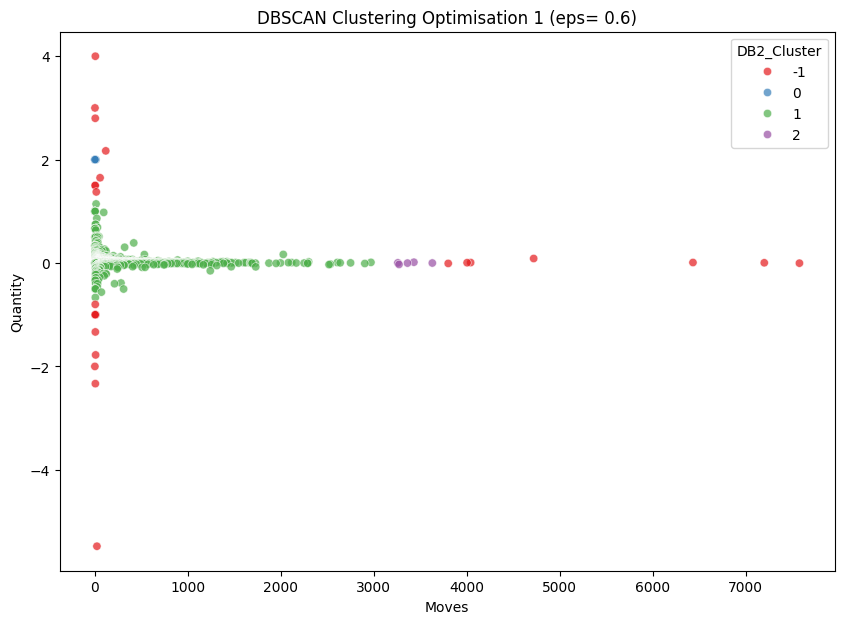

In [47]:
db2 = DBSCAN(eps=0.6, min_samples=5).fit(XS)

# Prédiction des clusters
s_2['DB2_Cluster'] = db2.labels_
print(s_2['DB2_Cluster'].value_counts())

# Sihlhouette score pour DBSCAN 2
db2_score = silhouette_score(XS, db2.labels_)
print(f"Silhouette score : {db2_score}")

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=s_2,
    x='Moves',
    y='Quantity',
    hue='DB2_Cluster',
    palette='Set1',
    sizes=(20, 200),
    alpha=0.7,
)
ax.set_title('DBSCAN Clustering Optimisation 1 (eps= 0.6)')


In [48]:
# Afficher les prédiction du modeèl DBSCAN Optimisé
seuil_exces = 1
classe = -1
dbs_surstock2 = s_2[(s_2['DB2_Cluster'] == classe) & (s_2['Quantity'] > seuil_exces)].copy()
dbs_surstock2 = dbs_surstock2.merge(item_map, on ='ProdId', how='left')
dbs_surstock2 = dbs_surstock2[['Name', 'Moves', 'Quantity']]
print(dbs_surstock2)

                                                Name  Moves  Quantity
0               SILYBON 140MG CP DET PL/10 MICROLABS      6  4.000000
1                          MIA BAUME RADRIAKAT/50ML       2  3.000000
2                      ATORVASTATINE 10MG B/30 ARROW      5  2.800000
3                          LAME A BISTOURIE N 10 DET    118  2.169492
4                          LAME A BISTOURIE N 12 DET     57  1.649123
5  PURESSENTIEL RESP OK FRICTION PECTORAL FL/100M...      4  1.500000
6               NAZOLIN 0,05% GTTE NAS FL/10ML SHIFA      4  1.500000
7              MECONERV FORTE CP DET PL/10 MICROLABS     16  1.375000


**Comparaison avec KMeans**

d:\MY_PYTHONS_VENVS\ste\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\MY_PYTHONS_VENVS\ste\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\herif\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\herif\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\herif\AppData\Local\Programs\Python\Python312\Lib\sub

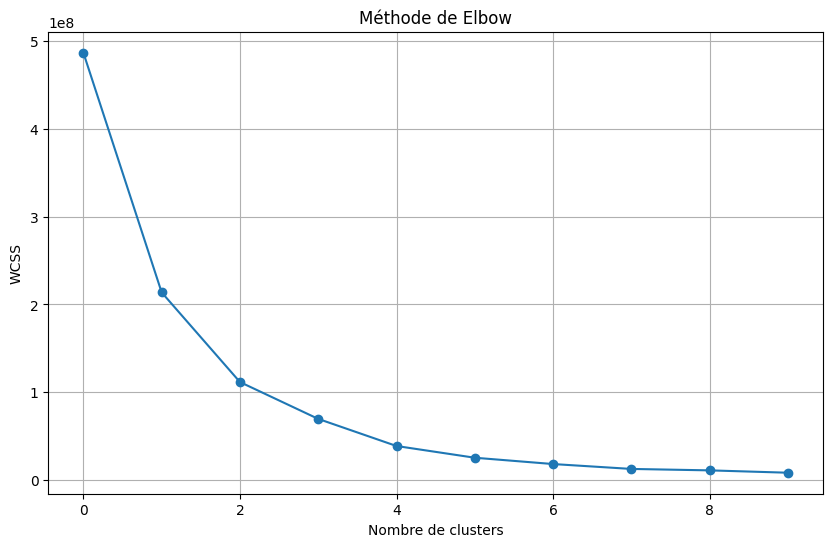

In [49]:
# Méthode de Elbow pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(wcss, marker='o')
plt.title('Méthode de Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


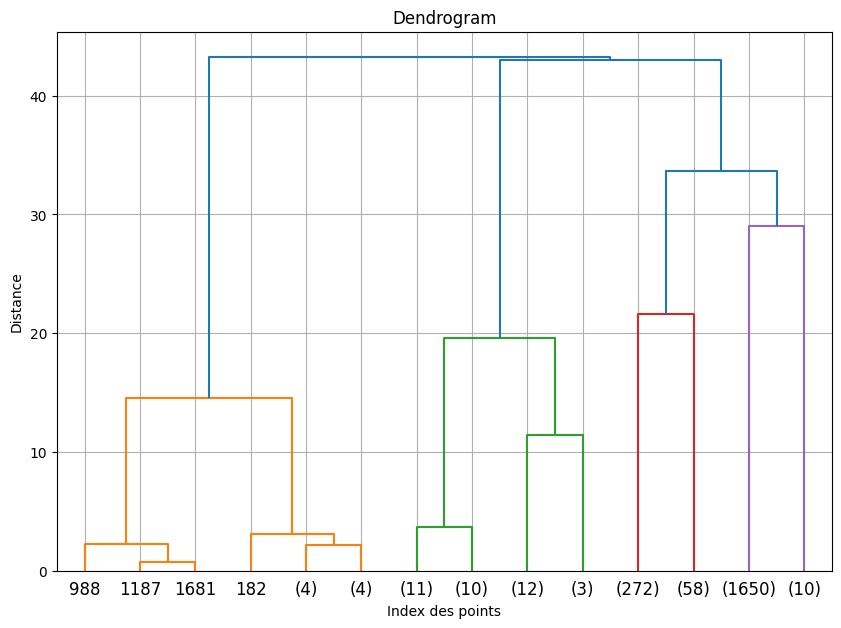

In [50]:
# Dendogramme pour déterminer le nombre optimal de clusters
Z = linkage(XS, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Index des points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [51]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=42)
km.fit(XS)

KMeans(n_clusters=4, random_state=42)

In [52]:
# Récupération des labels de cluster
s_2['KM_Cluster'] = km.labels_
s_2.head()

,ProdId,Moves,Quantity,DB_Cluster,DB2_Cluster,KM_Cluster
0,7625,6,4.000000,-1,-1,2
1,7662,2,3.000000,-1,-1,2
2,449,5,2.800000,-1,-1,2
3,2585,118,2.169492,-1,-1,2
4,7612,2,2.000000,0,0,2


In [53]:
# Afficher les valeurs uniques des clusters
s_2['KM_Cluster'].value_counts()

KM_Cluster
0    1967
1      43
2      27
3       1
Name: count, dtype: int64

In [54]:
# Afficher les centroïdes
km.cluster_centers_

array([[ -0.1042845 ,  -0.06788148],
       [  5.10128772,  -0.11168893],
       [ -0.50877312,   5.87612082],
       [ -0.49088522, -20.32976871]])

Text(0.5, 1.0, 'KMeans Clustering')

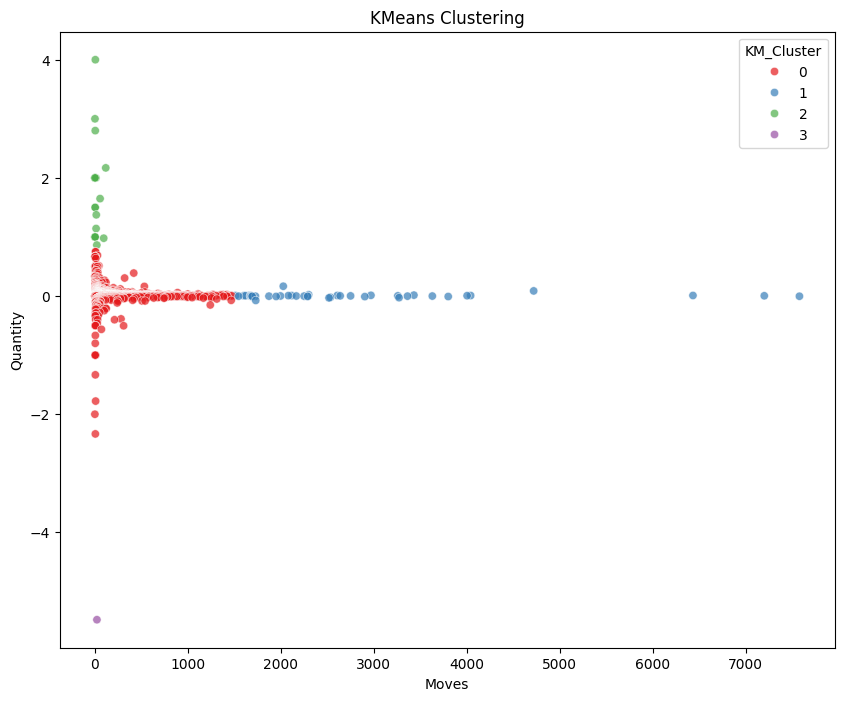

In [55]:
# Visualiser les clusters
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=s_2,
    x='Moves',
    y='Quantity',
    hue='KM_Cluster',
    palette='Set1',
    sizes=(20, 200),
    alpha=0.7
)
ax.set_title('KMeans Clustering')

In [56]:
# Calcule de silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(XS, km.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.85


In [57]:
# Afficher les produits en excès de stock
seuil_exces = 1
classe = 2
exces = s_2[(s_2['KM_Cluster'] == classe) & (s_2['Quantity'] > seuil_exces)].copy()
exces = exces.merge(item_map, on='ProdId', how='left')
exces = exces[['Name', 'Moves', 'Quantity']]
exces

,Name,Moves,Quantity
0,SILYBON 140MG CP DET PL/10 MICROLABS,6,4.000000
1,MIA BAUME RADRIAKAT/50ML,2,3.000000
2,ATORVASTATINE 10MG B/30 ARROW,5,2.800000
3,LAME A BISTOURIE N 10 DET,118,2.169492
4,IXINE40mg/5ML PPS FL/40ML EXPHAR,2,2.000000
5,PROGENIT+ FEMME CP B/60 3CHENES,2,2.000000
6,ACIDE TRANEXAMIQUE 500MG/5ML AMP INJ B/5 AGUETTAN,1,2.000000
7,MANIX SKYN AQUA FEEL GEL LUBRIFIANT T/80ml,2,2.000000
8,NaN,2,2.000000
9,DYGLI-M 50MG/1000MG CP DET PL/10 MICROLABS,12,2.000000


**Analyse par produit V2**

In [58]:
P1 = df_1.copy()
P1 = (
    P1.groupby('ProdId').agg(
        Moves = ('ProdId', 'count'),
        TotalIn = ('Quantity', lambda x: x[x > 0].sum()),
        TotalOut = ('Quantity', lambda x: -x[x < 0].sum()),
        AVGVar = ('Quantity', 'mean'),
        Volatility = ('Quantity', 'std'),
        MeanStock =('LastStock', 'mean')).reset_index()
)

In [59]:
P1.head()

,ProdId,Moves,TotalIn,TotalOut,AVGVar,Volatility,MeanStock
0,100,77,49.0,47.0,0.025974,1.413972,1.272727
1,102,12,6.0,6.0,0.000000,1.044466,0.500000
2,106,13,8.0,8.0,0.000000,1.354006,0.846154
3,113,360,273.0,269.0,0.011111,1.670617,3.147222
4,115,52,28.0,27.0,0.019231,1.093481,0.576923


In [60]:
P1.isna().sum()

ProdId        0
Moves         0
TotalIn       0
TotalOut      0
AVGVar        0
Volatility    4
MeanStock     0
dtype: int64

In [61]:
# Traitement des valeurs manquantes
#P1['Volatility'].fillna(0, inplace=True)
P1.fillna({'Volatility': 0}, inplace=True)

In [62]:
# Correlation entre les variables
corr = P1[['Moves', 'TotalIn', 'TotalOut', 'AVGVar', 'Volatility', 'MeanStock']].corr()
print(corr)

               Moves   TotalIn  TotalOut    AVGVar  Volatility  MeanStock
Moves       1.000000  0.807044  0.805130 -0.054607    0.354879   0.572760
TotalIn     0.807044  1.000000  0.999888 -0.030039    0.632890   0.776726
TotalOut    0.805130  0.999888  1.000000 -0.034152    0.631411   0.775088
AVGVar     -0.054607 -0.030039 -0.034152  1.000000    0.006422   0.018968
Volatility  0.354879  0.632890  0.631411  0.006422    1.000000   0.811634
MeanStock   0.572760  0.776726  0.775088  0.018968    0.811634   1.000000


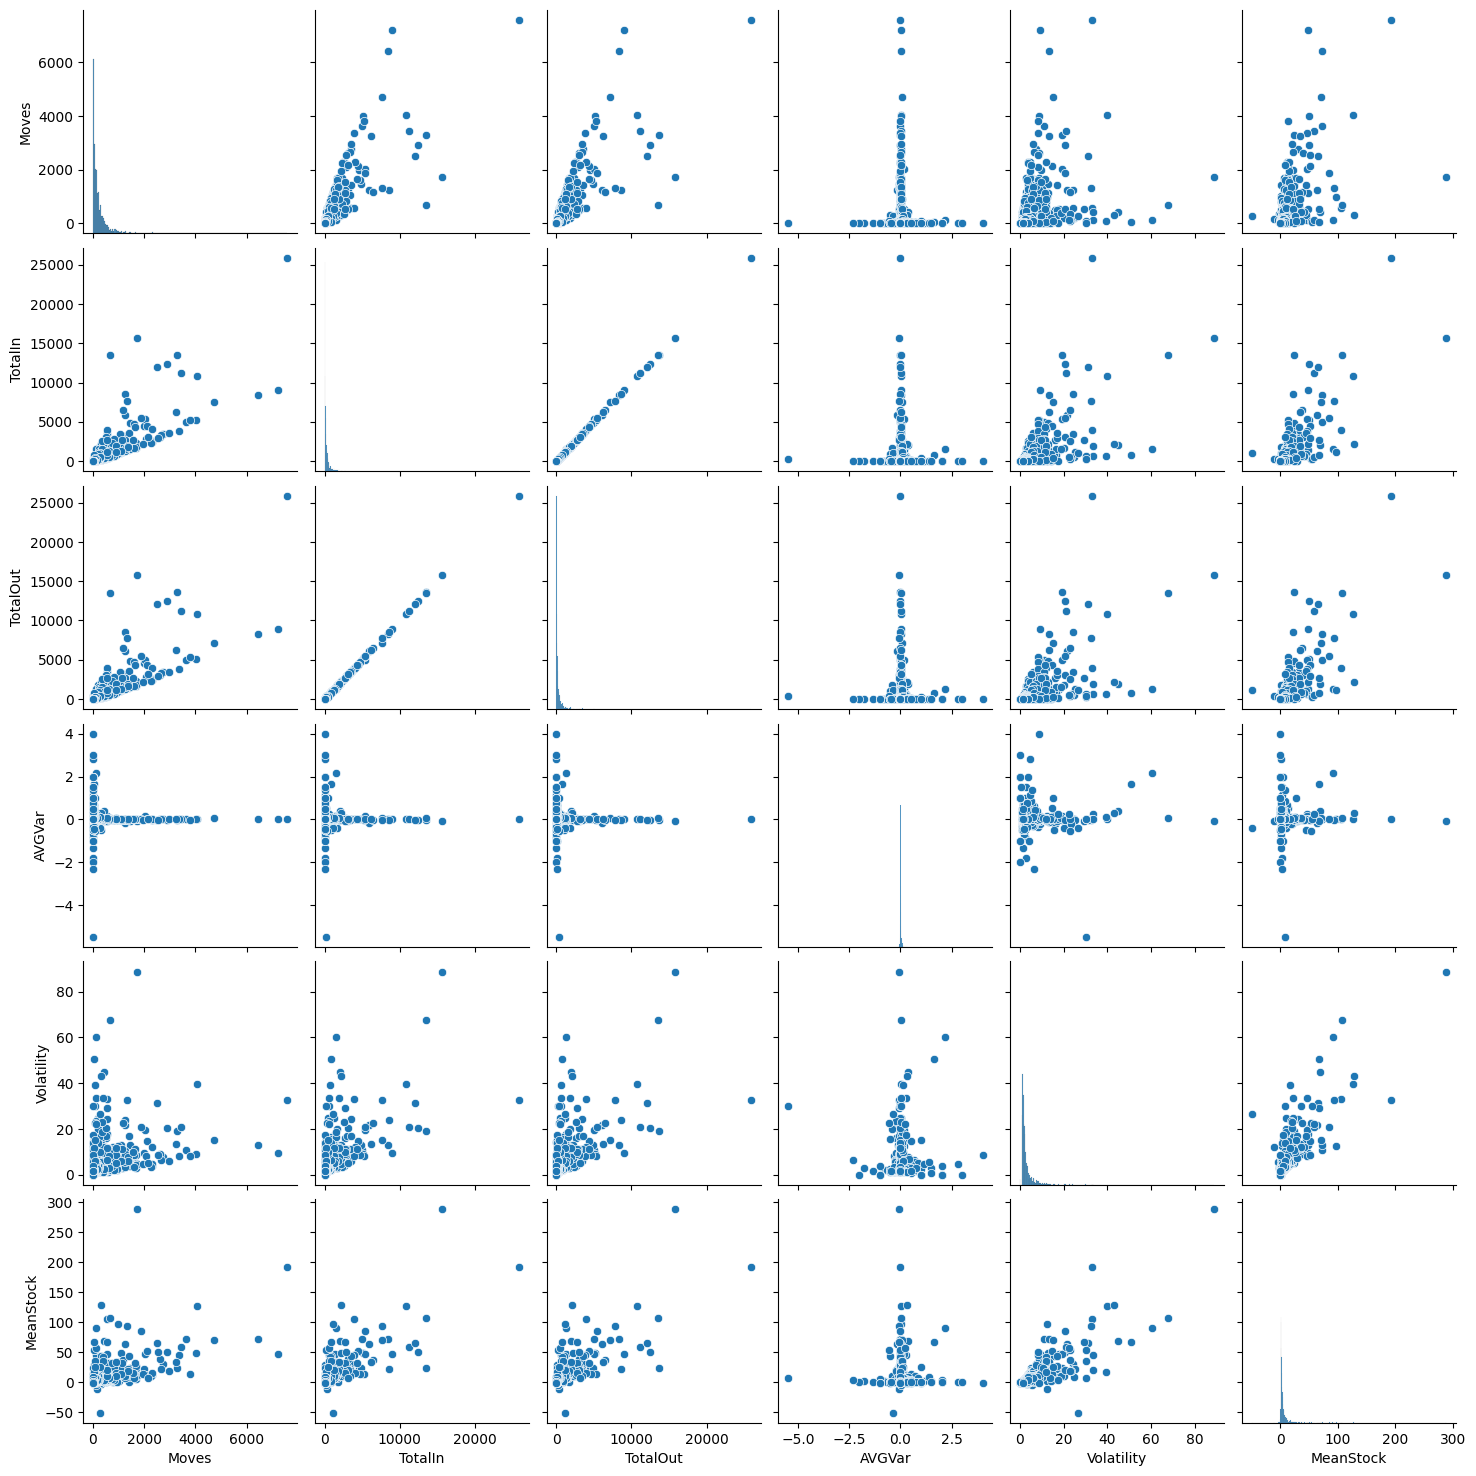

In [63]:
# Visualisation des nuages de points
sns.pairplot(P1[['Moves', 'TotalIn', 'TotalOut', 'AVGVar', 'Volatility', 'MeanStock']])
plt.show()


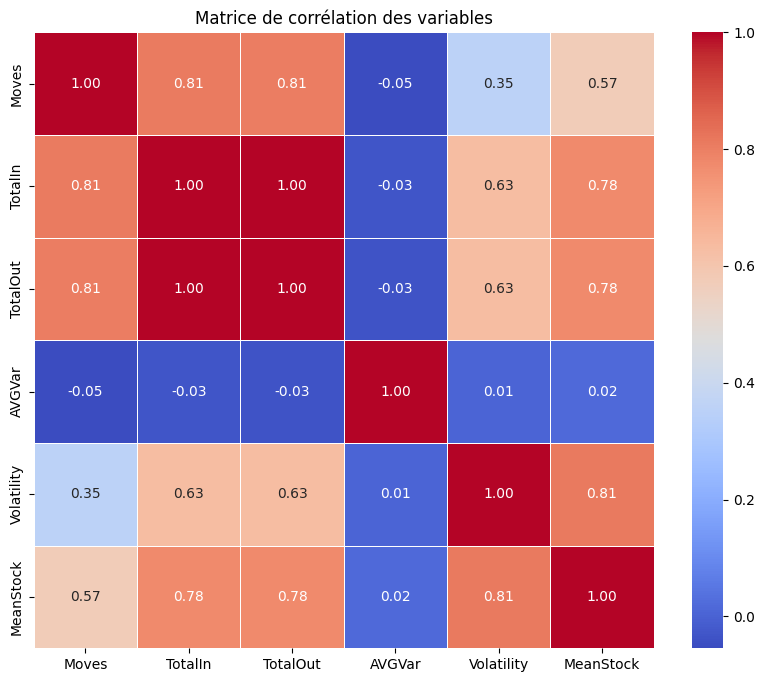

In [64]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des variables')
plt.show()

**Normalisation des données**

In [65]:
X2 = P1[['Moves', 'TotalIn', 'TotalOut', 'AVGVar', 'Volatility', 'MeanStock']].values

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

**Analyse en composantes principales (PCA) avant la classification KMean**

In [66]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=6)
pca1.fit(X2_scaled)

PCA(n_components=6)

In [67]:
pca1.explained_variance_ratio_

array([6.49576289e-01, 1.68750793e-01, 1.25735227e-01, 3.14235690e-02,
       2.44986895e-02, 1.54331629e-05])

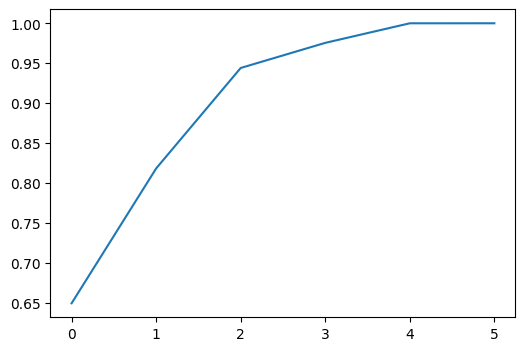

In [68]:
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [69]:
info_percent = 0.95
ncomp = np.argmax(np.cumsum(pca1.explained_variance_ratio_) >= info_percent)
print(f"Nombre de composantes pour {info_percent:.0%} de variance : {ncomp}")

Nombre de composantes pour 95% de variance : 3


In [70]:
pca2 = PCA(n_components=ncomp)
X2_pca = pca2.fit_transform(X2_scaled)

In [71]:
# Poids des variables dans chaque composante
col = ['Moves', 'TotalIn', 'TotalOut', 'AVGVar', 'Volatility', 'MeanStock']

components = pd.DataFrame(pca2.components_, columns=col)
components

,Moves,TotalIn,TotalOut,AVGVar,Volatility,MeanStock
0,0.408953,0.488609,0.488086,-0.014707,0.389599,0.451427
1,-0.127493,-0.034075,-0.038169,0.975085,0.137881,0.106419
2,-0.567615,-0.189409,-0.188818,-0.219534,0.663231,0.343824


In [77]:
print(X2_pca[:, 0], X2_pca[:, 1])

[-0.71145295 -0.85587453 -0.81675953 ... -1.07537964 -0.80659562
 -0.87585578] [-0.04896325 -0.13960522 -0.1285085  ...  7.02103592  1.6830849
 -0.13505613]


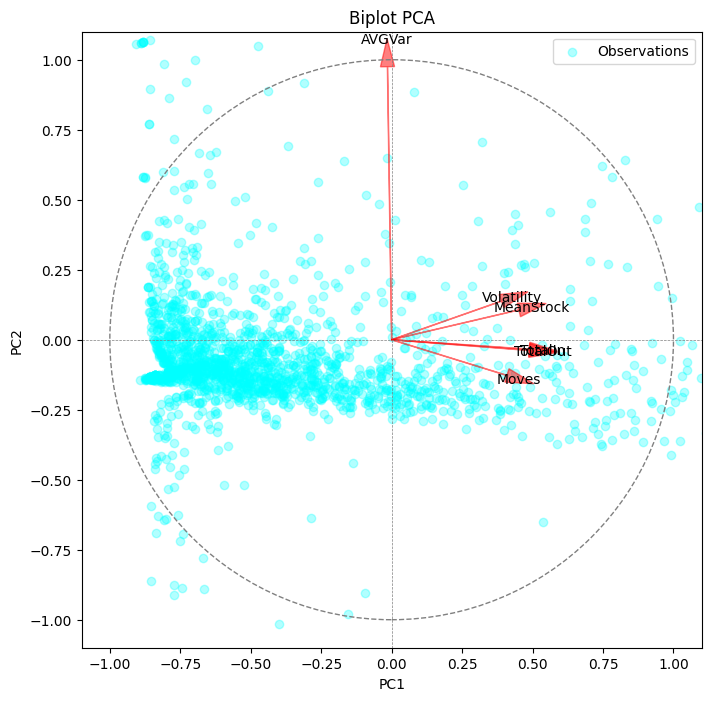

In [76]:
plt.figure(figsize=(8, 8))

# Nuage de points des observations projetées
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], alpha=0.3, color='cyan', label='Observations')

# Flèches des variables
for i, var in enumerate(col):
    plt.arrow(
        0, 0, pca2.components_[0, i], pca2.components_[1, i],
        color='r', alpha=0.5, head_width=0.05, head_length=0.1
    )
    plt.text(
        pca2.components_[0, i] * 1.1, pca2.components_[1, i] * 1.1,
        var, color='black', ha='center', va='center'
    )

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(circle)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot PCA')
plt.legend()
plt.show()

In [97]:
new_col = ['Moves', 'MeanStock', 'AVGVar']
X3 = P1[new_col].values
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [98]:
kmeans2 = KMeans(n_clusters=4, random_state=42)
P1['Cluster2'] = kmeans2.fit_predict(X3_scaled)

In [99]:
X3_pca = pca2.fit_transform(X3_scaled)


In [100]:
P1['Cluster2'].value_counts()

Cluster2
0    1933
2      76
3      27
1       2
Name: count, dtype: int64

In [101]:
X3_pca

array([[-0.47403331, -0.04938097, -0.06580736],
       [-0.60771464, -0.14624254, -0.12466575],
       [-0.58667087, -0.14367774, -0.14275711],
       ...,
       [-0.97536575,  7.1881679 ,  0.55147207],
       [-0.6381159 ,  1.69601022, -0.02128763],
       [-0.67880875, -0.15318102, -0.0826709 ]])

In [104]:
P1['PC1'] = X3_pca[:, 0]
P1['PC2'] = X3_pca[:, 1]
P1['PC3'] = X3_pca[:, 2]

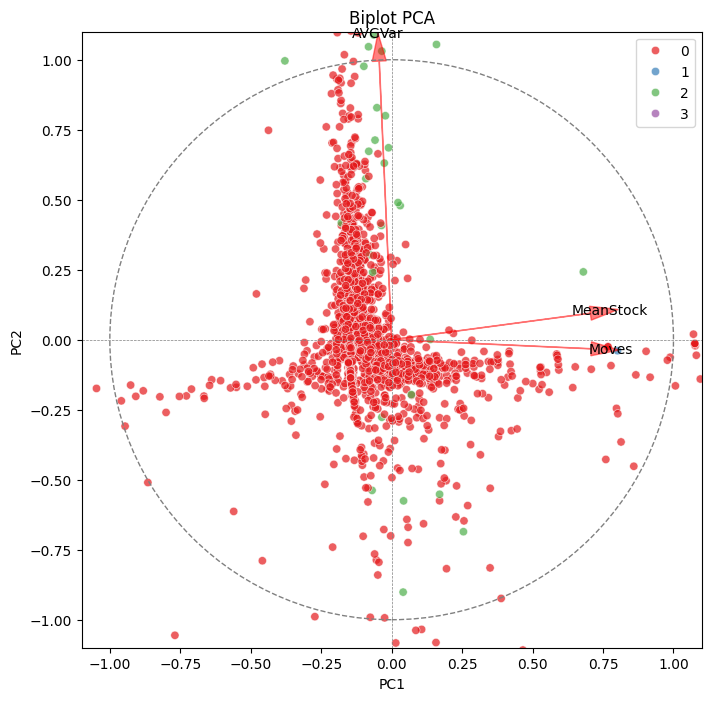

In [ ]:
plt.figure(figsize=(8, 8))

# Nuage de points des observations projetées
#plt.scatter(X3_pca[:, 0], X3_pca[:, 1], alpha=0.3, hue=P1['Cluster2'])

sns.scatterplot(
    data=P1,
    x='PC2', y='PC3',
    hue='Cluster2',
    palette='Set1',
    alpha=0.7,
    legend='full'
)
# Flèches des variables
for i, var in enumerate(new_col):
    plt.arrow(
        0, 0, pca2.components_[0, i], pca2.components_[1, i],
        color='r', alpha=0.5, head_width=0.05, head_length=0.1
    )
    plt.text(
        pca2.components_[0, i] * 1.1, pca2.components_[1, i] * 1.1,
        var, color='black', ha='center', va='center'
    )

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(circle)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot PCA')
plt.legend()
plt.show()

Text(0.5, 0.92, 'Biplot PCA 3D')

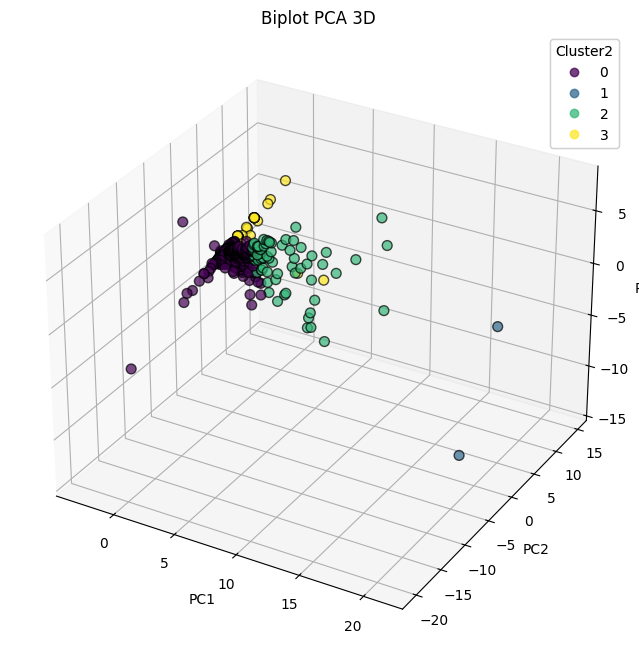

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points 3D
scatter = ax.scatter(
    P1['PC1'], P1['PC2'], P1['PC3'],
    c=P1['Cluster2'], cmap='viridis',
    s=50, alpha=0.7, edgecolor='k'
)

# Légende des clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster2")
ax.add_artist(legend1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Biplot PCA 3D')